<a href="https://colab.research.google.com/github/Elwing-Chou/tiba0619/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
# ((nparray:x_train, nparray:y_train), (nparray:x_test, nparray:y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
y_train = y_train.reshape(50000)
y_test = y_test.reshape(10000)

In [8]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

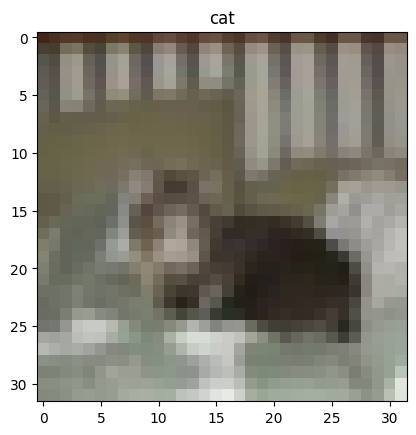

In [12]:
import matplotlib.pyplot as plt

idx = 150
plt.title("{}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

l = [
    # 1個filter(3 * 3 * 3) * 64(種過濾方式 + 64(bias)
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種過濾方式) + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)        0